In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


In [2]:
import tensorflow as tf

print(tf.__version__)


2.1.0


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [5]:
PATH = os.path.join(os.getcwd(), 'category_unzipped')


In [6]:
train_dir = os.path.join(PATH, 'train')
valid_dir = os.path.join(PATH, 'valid')


In [7]:
train_melanoma_dir = os.path.join(train_dir, 'melanoma')
train_nevus_dir = os.path.join(train_dir, 'nevus')
train_seborrheic_keratosis_dir = os.path.join(train_dir, 'seborrheic_keratosis')

valid_melanoma_dir = os.path.join(valid_dir, 'melanoma')
valid_nevus_dir = os.path.join(valid_dir, 'nevus')
valid_seborrheic_keratosis_dir = os.path.join(valid_dir, 'seborrheic_keratosis')

In [8]:
num_melanoma_tr = len(os.listdir(train_melanoma_dir))
num_nevus_tr = len(os.listdir(train_nevus_dir))
num_seborrheic_keratosis_tr = len(os.listdir(train_seborrheic_keratosis_dir))

num_melanoma_val = len(os.listdir(valid_melanoma_dir))
num_nevus_val = len(os.listdir(valid_nevus_dir))
num_seborrheic_keratosis_val = len(os.listdir(valid_seborrheic_keratosis_dir))

total_train = num_melanoma_tr + num_nevus_tr + num_seborrheic_keratosis_tr
total_valid = num_melanoma_val + num_nevus_val + num_seborrheic_keratosis_val

In [9]:
print('total training melanoma images:', num_melanoma_tr)
print('total training nevus images:', num_nevus_tr)
print('total training seborrheic_keratosis images:', num_seborrheic_keratosis_tr)

print('total validation melanoma images:', num_melanoma_val)
print('total validation nevus images:', num_nevus_val)
print('total validation seborrheic_keratosis images:', num_seborrheic_keratosis_val)
      
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_valid)


total training melanoma images: 250
total training nevus images: 250
total training seborrheic_keratosis images: 250
total validation melanoma images: 30
total validation nevus images: 30
total validation seborrheic_keratosis images: 30
--
Total training images: 750
Total validation images: 90


In [10]:
class_names = ['melanoma', 'nevus', 'seborrheic_keratosis']


In [11]:
batch_size = 32
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150


In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)
valid_image_generator = ImageDataGenerator(rescale=1./255)


In [13]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 750 images belonging to 3 classes.


In [14]:
valid_data_gen = valid_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=valid_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


Found 90 images belonging to 3 classes.


In [15]:
train_images, train_labels = next(train_data_gen)
valid_images, valid_labels = next(valid_data_gen)


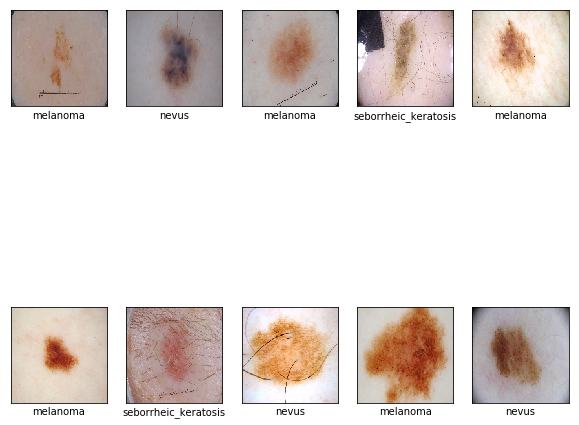

In [16]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()


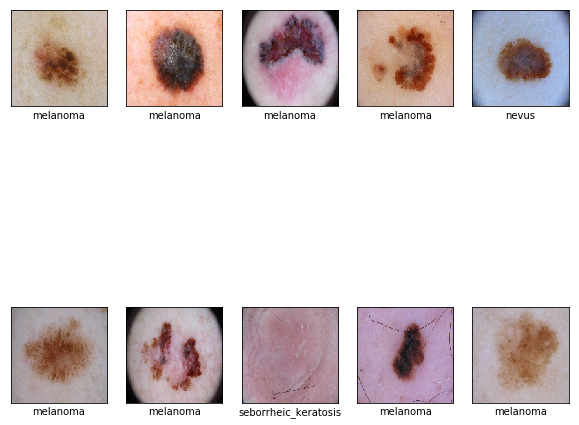

In [17]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(valid_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(valid_labels[i])])
plt.show()


In [18]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3)
])


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [20]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=valid_data_gen,
    validation_steps=total_valid // batch_size,
)


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 23 steps, validate for 2 steps
Epoch 1/5
23/23 [==============================] - 132s 6s/step - loss: 1.1010 - accuracy: 0.4638 - val_loss: 0.8809 - val_accuracy: 0.6250
Epoch 2/5
23/23 [==============================] - 131s 6s/step - loss: 0.8762 - accuracy: 0.5919 - val_loss: 1.0948 - val_accuracy: 0.6094
Epoch 3/5
23/23 [==============================] - 120s 5s/step - loss: 0.8039 - accuracy: 0.6365 - val_loss: 0.6229 - val_accuracy: 0.7344
Epoch 4/5
23/23 [==============================] - 121s 5s/step - loss: 0.7239 - accuracy: 0.6739 - val_loss: 0.7306 - val_accuracy: 0.6719
Epoch 5/5
23/23 [==============================] - 120s 5s/step - loss: 0.6664 - accuracy: 0.6978 - val_loss: 0.6333 - val_accuracy: 0.7031


In [21]:
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=2)

valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2)

print('\nTrain accuracy:', train_acc)
print('\nValid accuracy:', valid_acc)


32/32 - 0s - loss: 0.6955 - accuracy: 0.7188
32/32 - 0s - loss: 0.6240 - accuracy: 0.6875

Train accuracy: 0.71875

Valid accuracy: 0.6875


In [22]:
model.save('category_model.h5')

In [23]:
count = 0
for i in range(32):
    prediction = model.predict(np.array([train_images[i]]))[0]
    prediction = np.argmax(prediction)
    if class_names[prediction] != class_names[int(train_labels[i])]:
        count += 1
count

9

In [24]:
count = 0
for i in range(32):
    prediction = model.predict(np.array([valid_images[i]]))[0]
    prediction = np.argmax(prediction)
    if class_names[prediction] != class_names[int(valid_labels[i])]:
        count += 1
count

10

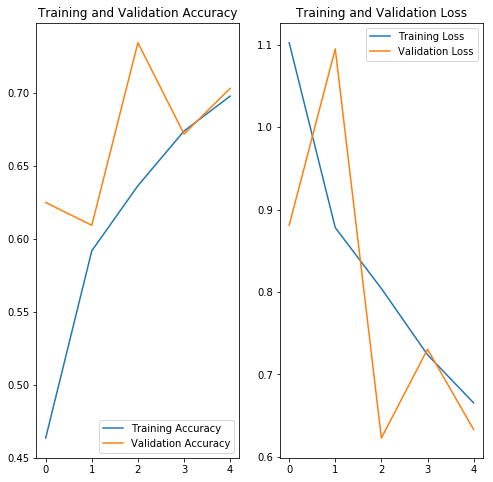

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [29]:
for i in range(32):
    print(class_names[model.predict_classes(np.array([valid_images[i]]))[0]])

nevus
melanoma
nevus
melanoma
nevus
nevus
nevus
seborrheic_keratosis
nevus
nevus
nevus
seborrheic_keratosis
nevus
seborrheic_keratosis
nevus
seborrheic_keratosis
seborrheic_keratosis
nevus
nevus
nevus
nevus
seborrheic_keratosis
nevus
nevus
nevus
nevus
seborrheic_keratosis
nevus
nevus
seborrheic_keratosis
nevus
nevus


In [28]:
prediction

1